In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## load img data

In [33]:
file_list = os.listdir("./visualization/selected_last20val")

In [34]:
NUM_DESC = 4
DESC_HEIGHT = 7
DESC_WIDTH = 41
# DESC_HEIGHT = 20
# DESC_WIDTH = 3
DESC_NP_HEIGHT = 16
DESC_NP_WIDTH = 16

In [35]:
sat_imgs_list = []
grd_imgs_list = []
for i in range(1, 21):
    index = f"{i}"
    sat_imgs_list.append( np.array( Image.open(f"./visualization/selected_last20val/psat_{index}.png") )[None, :, :, :] )
    grd_imgs_list.append( np.array( Image.open(f"./visualization/selected_last20val/grd_{index}.jpg") )[None, :, :, :] )

sat_imgs = np.concatenate(sat_imgs_list, axis=0)
grd_imgs = np.concatenate(grd_imgs_list, axis=0)

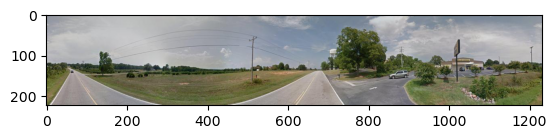

In [36]:
plt.imshow(grd_imgs[1])

## load descriptor data

In [37]:
!ls /visualization/polar

ls: cannot access /visualization/polar: No such file or directory


In [38]:
grd = np.load("./visualization/polar/grd_des.npy")

In [39]:
grd.shape

(20, 287, 4)

In [40]:
grd_draw = grd.reshape(20, DESC_HEIGHT, DESC_WIDTH, NUM_DESC)

In [41]:
grd_mean = np.mean(grd_draw, axis=0)

In [42]:
print(np.mean(grd_mean))

0.0009544035


In [43]:
grd_diff = np.zeros((20, DESC_HEIGHT, DESC_WIDTH, NUM_DESC))
for j in range(NUM_DESC):
    for i in range(20):
        grd_diff[i,:,:,j] = grd_draw[0, :, :, j] - grd_draw[i, :, :, j]

In [44]:
print(np.mean(grd_diff[:,:,:,1]), np.mean(grd_draw[:,:,:,1]))

8.522792482417634e-06 0.00017519773


In [45]:
sat = np.load("./visualization/polar/sat_des.npy")
sat_draw = sat.reshape(20, DESC_HEIGHT, DESC_WIDTH, NUM_DESC)
sat_mean = np.mean(sat_draw, axis=0)

## plot

In [46]:
def plot_cmp(des, des_mean, des_diff, img, idx, show_diff=True):
    """
    NOTE des_diff is computed wrt reference img, i.e., img[0]
    """
    fig, axs = plt.subplots(6, 3, gridspec_kw=dict(hspace=0.1, wspace=0.01), figsize=(14,6))

    axs[0,0].imshow(des_diff[0])
    axs[0,0].set_xticks([])
    axs[0,0].set_yticks([])
    for i in range(len(idx)):
        axs[i+1,0].imshow(des_diff[idx[i]])
        axs[i+1,0].set_xticks([])
        axs[i+1,0].set_yticks([])
    
    if show_diff:
        axs[0,1].imshow(des[0]-des_mean)
    else:
        axs[0,1].imshow(des[0])
    axs[0,1].set_xticks([])
    axs[0,1].set_yticks([])
    for i in range(len(idx)):
        if show_diff:
            signal = des[idx[i]]-des_mean
        else:
            signal = des[idx[i]]
        axs[i+1,1].imshow(signal)
        axs[i+1,1].set_xticks([])
        axs[i+1,1].set_yticks([])
    
    axs[0,2].imshow(img[0])
    axs[0,2].set_xticks([])
    axs[0,2].set_yticks([])
    for i in range(len(idx)):
        axs[i+1,2].imshow(img[idx[i]])
        axs[i+1,2].set_xticks([])
        axs[i+1,2].set_yticks([])


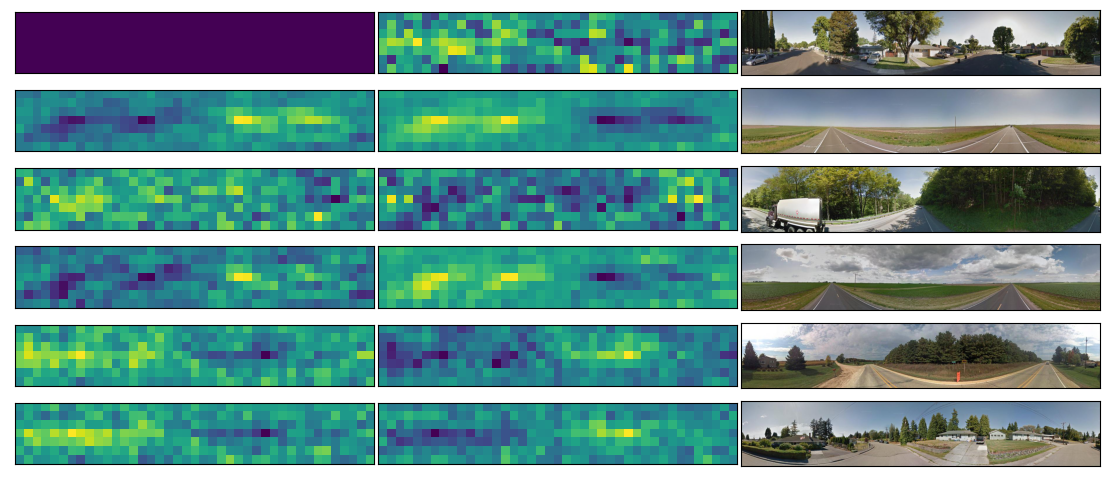

In [47]:
plot_cmp(grd_draw[:, :, :, 0], grd_mean[:,:,0], grd_diff[:,:,:,0], grd_imgs, idx=[6,7,9,10,12], show_diff=True)

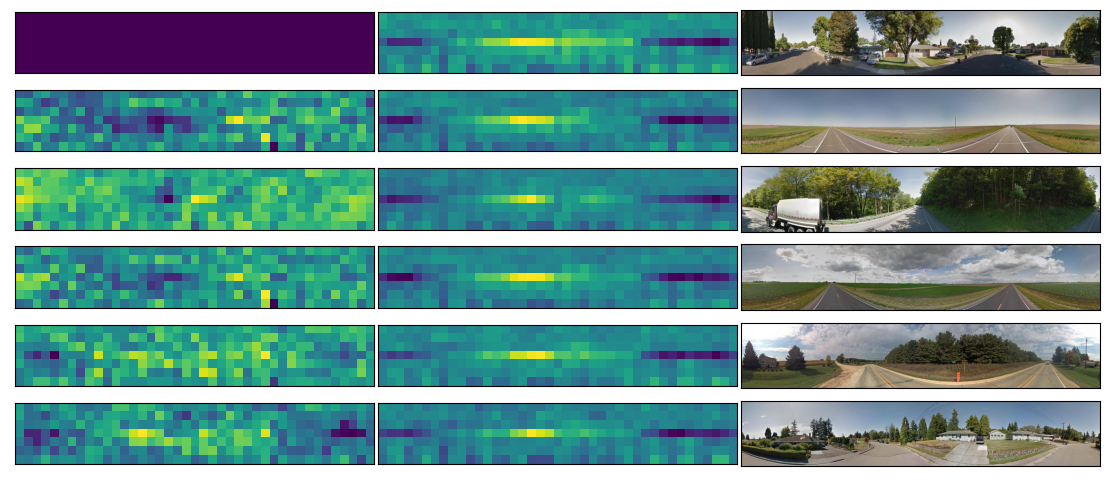

In [48]:
plot_cmp(grd_draw[:, :, :, 1], grd_mean[:,:,1], grd_diff[:,:,:,1], grd_imgs, idx=[6,7,9,10,12], show_diff=False)

In [49]:
def plot_cmp2(des, des_mean, img, idx=[6,7,9,10,12], figtitle=None):
    """
    NOTE
    """
    fig, axs = plt.subplots(6, 3, gridspec_kw=dict(hspace=0.1, wspace=0.01), figsize=(14,6))

    axs[0,0].imshow(des[0])
    axs[0,0].set_xticks([])
    axs[0,0].set_yticks([])
    axs[0,0].set_title("Raw Descriptor")
    for i in range(len(idx)):
        axs[i+1,0].imshow(des[idx[i]])
        axs[i+1,0].set_xticks([])
        axs[i+1,0].set_yticks([])

    axs[0,1].imshow(des[0]-des_mean)
    axs[0,1].set_title("Des. Fluctuation")
    axs[0,1].set_xticks([])
    axs[0,1].set_yticks([])
    for i in range(len(idx)):
        signal = des[idx[i]]-des_mean
        axs[i+1,1].imshow(signal)
        axs[i+1,1].set_xticks([])
        axs[i+1,1].set_yticks([])

    axs[0,2].imshow(img[0])
    axs[0,2].set_xticks([])
    axs[0,2].set_yticks([])
    axs[0,2].set_title("Raw Image")
    for i in range(len(idx)):
        axs[i+1,2].imshow(img[idx[i]])
        axs[i+1,2].set_xticks([])
        axs[i+1,2].set_yticks([])
        
    if figtitle is not None:
        fig.savefig(f"./{figtitle}.png", bbox_inches='tight', dpi=200, facecolor="w")
        plt.close(fig)

In [50]:
plot_cmp2(grd_draw[:, :, :, 0], grd_mean[:,:,0], grd_imgs, idx=[6,7,9,10,12], figtitle="grd_des1")

In [ ]:
plot_cmp2(grd_draw[:, :, :, 1], grd_mean[:,:,1], grd_imgs, idx=[6,7,9,10,12], figtitle="grd_des2")

In [ ]:
plot_cmp2(sat_draw[:, :, :, 0], sat_mean[:,:,0], sat_imgs, idx=[6,7,9,10,12], figtitle="sat_des1")

In [ ]:
plot_cmp2(sat_draw[:, :, :, 1], sat_mean[:,:,1], sat_imgs, idx=[6,7,9,10,12], figtitle="sat_des2")

In [ ]:
plot_cmp2(grd_draw[:, :, :, 2], grd_mean[:,:,0], grd_imgs, idx=[6,7,9,10,12], figtitle="grd_des3")
plot_cmp2(sat_draw[:, :, :, 2], sat_mean[:,:,0], sat_imgs, idx=[6,7,9,10,12], figtitle="sat_des3")
plot_cmp2(grd_draw[:, :, :, 3], grd_mean[:,:,0], grd_imgs, idx=[6,7,9,10,12], figtitle="grd_des4")
plot_cmp2(sat_draw[:, :, :, 3], sat_mean[:,:,0], sat_imgs, idx=[6,7,9,10,12], figtitle="sat_des4")